# Title

**Customer Clustering**


---
Saya akan melakukan customer clustering menggunakan dataset yang ada yaitu dataset `IndonesiaCreditData`. Hasil clustering akan menentukan mana customer yang merupakan good risk dan mana customer yang merupakan bad risk.



# Introduction

Nama saya Immanuel Yosia Alfrenco. Saya merupakan freshgraduate dari jurusan Informatika Universitas Sebelas Maret. Saya sudah berhasil menyelesaikan bootcamp Full Time Data Science Hacktiv8 dan lulus dengan Graduate Honors.

# External Link

https://public.tableau.com/app/profile/immanuel.yosia/viz/SinarmasTest/Dashboard1#1

# Working Area

## Import Library

In [160]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
# Untuk connect Google Drive
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

import warnings
warnings.filterwarnings('ignore')

# Untuk membuat model
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering as SC, AgglomerativeClustering as AC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap
import plotly.express as px

# Untuk menyiapkan dataset
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer

## Data Loading

In [162]:
# Menghubungkan Colab dengan Google Drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [163]:
# Melakukan import data dari csv

data_ori = pd.read_csv('gdrive/My Drive/Dataset/Sinarmas-Dataset.csv')

In [164]:
# Duplikasi dataset untuk backup

data = data_ori.copy()

In [165]:
# Mengecek head

data.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car


In [166]:
# Mengecek tail

data.tail()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV
999,999,27,male,2,own,moderate,moderate,56737824,45,car


In [167]:
# check dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


Dalam dataset yang digunakan ini terdapat 10 kolom dimana ada 5 kolom bertipe numeric dan 5 kolom bertipe object, namun ada satu kolom `No` yang tidak penting karena hanya berisi nomor urut dimana akan kita hapus.

In [168]:
data.drop('No', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Sekarang sisa kolom kita adalah 9 kolom karena kita sudah menghapus kolom `No`.

## Exploratory Data Analysis (EDA)

In [169]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,35.546000,1.904000,4.056033e+07,20.903000
std,11.375469,0.653614,3.499911e+07,12.058814
min,19.000000,0.000000,3.099750e+06,4.000000
25%,27.000000,2.000000,1.693083e+07,12.000000
50%,33.000000,2.000000,2.875948e+07,18.000000
75%,42.000000,2.000000,4.925193e+07,24.000000
max,75.000000,3.000000,2.284392e+08,72.000000


Dari informasi di atas kita bisa mengambil kesimpulan :
* Usia termuda pengguna kartu kredit yaitu berusia 19 tahun dan usia tertua yaitu 75 tahun.
* Jumlah credit amount berada di antara 3 juta rupiah hingga 220 juta rupiah.
* Rata- rata durasi peminjaman yaitu 21 bulan.

### Sex

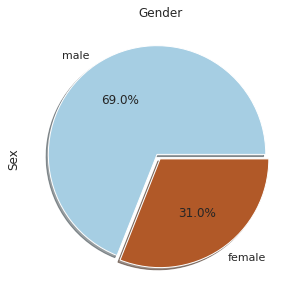

In [170]:
plt.figure(figsize=(15,5))
data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0], shadow=True, cmap='Paired')
plt.title('Gender')
plt.show()

Dataset kita ternyata memiliki user dengan perbandingan gender 69% laki-laki dan 31% perempuan.

### Age

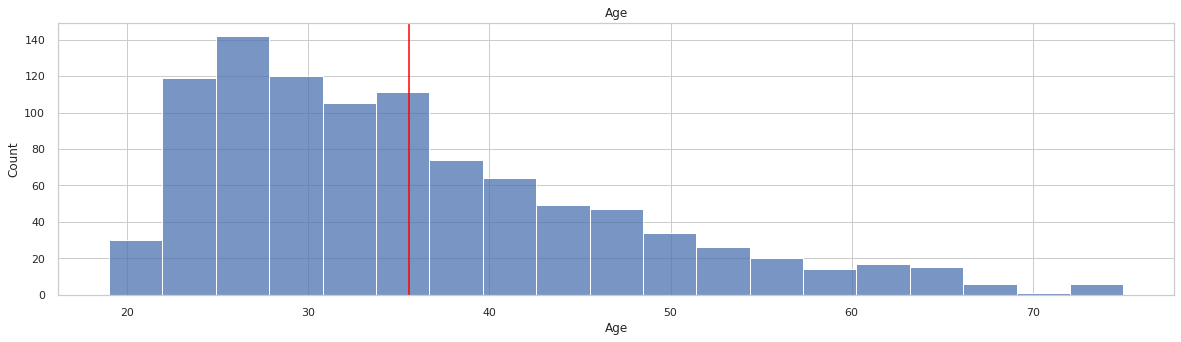

Rata-rata Umur :  35.546


In [171]:
plt.figure(figsize=(20, 5))
sns.histplot(data=data, x='Age')
plt.axvline(x=data.Age.mean(), color='red')
plt.title('Age')
plt.show()
print('Rata-rata Umur : ', data.Age.mean())

Pengguna kartu kredit di Indonesia berdasarkan dataset yang ada memiliki umur termuda yaitu 19 tahun dan umur tertua 75 tahun, dimana rata-rata umur pengguna kartu kredit adalah 35 tahun.

### Job

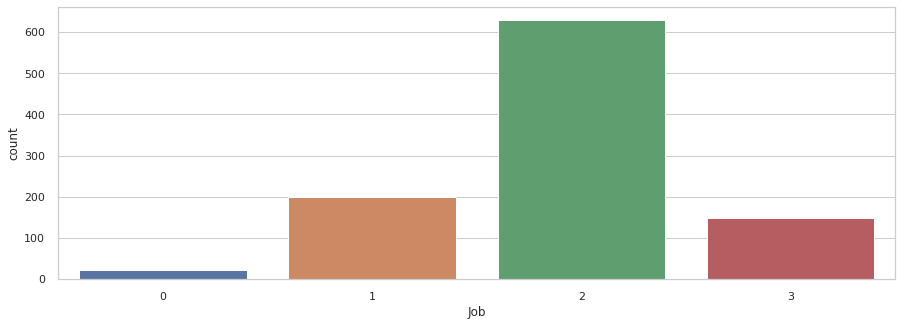

In [172]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Job')
plt.show()

* 0 - unskilled and non-resident
* 1 - unskilled and resident
* 2 - skilled
* 3 - highly skilled

Dari visual di atas kita bisa melihat bahwa Skilled Worker adalah golongan pekerja yang paling banyak menggunakan kartu kredit sedangkan unskilled dan non-resident worker adalah golongan perkerja yang paling jarang menggunakan kartu kredit.


### Housing

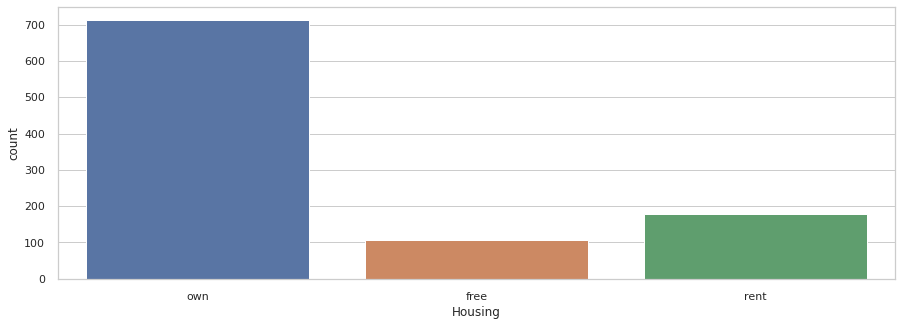

In [173]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Housing')
plt.show()

Berdasarkan visual di atas ternyata orang yang paling banyak menggunakan kartu kredit biasanya memiliki rumah sendiri.

### Saving Accounts

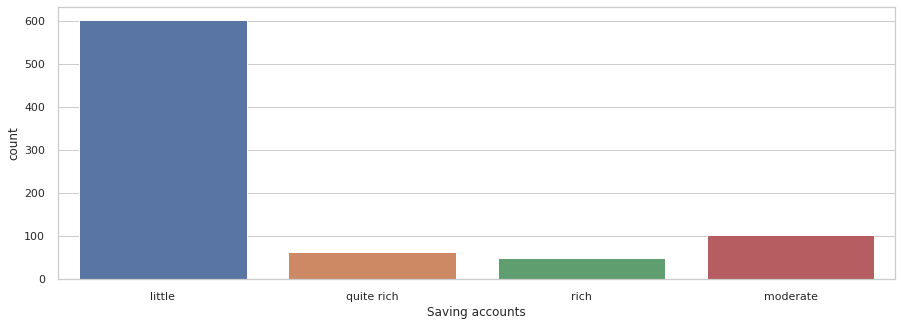

In [174]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Saving accounts')
plt.show()

Ternyata mayoritas pengguna kartu kredit di Indonesia adalah orang yang memiliki jumlah tabungan sedikit, jadi mereka memilih menggunakan kartu kredit untuk membeli keperluan mereka.

### Checking Accounts

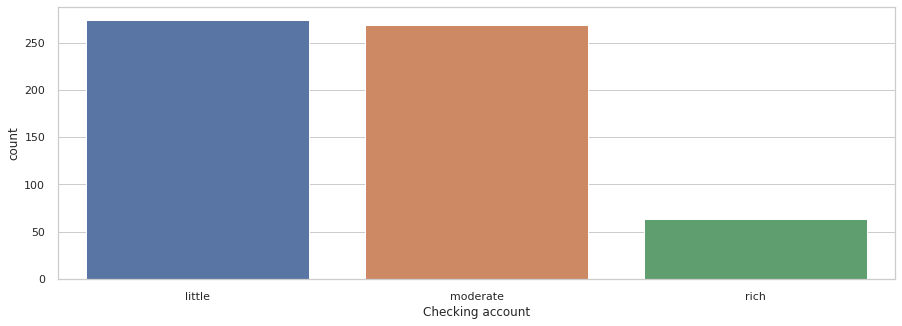

In [175]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Checking account')
plt.show()

Untuk rekening giro, bisa dilihat yang jumlah rekeningnya kecil dan sedang adalah orang-orang yang banyak menggunakan kartu kredit.

### Credit Amount

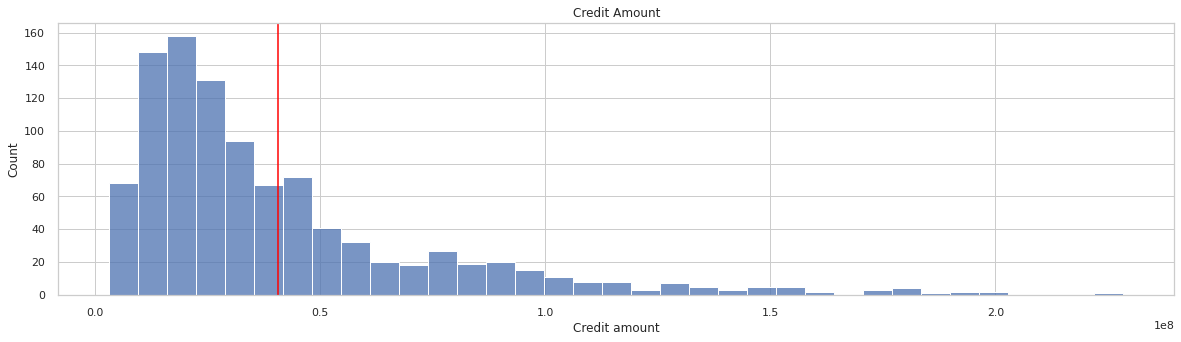

Rata-rata Jumlah Kredit :  40560327.942


In [176]:
plt.figure(figsize=(20, 5))
sns.histplot(data=data, x='Credit amount')
plt.axvline(x=data['Credit amount'].mean(), color='red')
plt.title('Credit Amount')
plt.show()
print('Rata-rata Jumlah Kredit : ', data['Credit amount'].mean())

Jumlah kredit yang digunakan paling kecil adalah 3 juta dan paling besar 200 juta dengan jumlah rata-rata 40 juta.

### Duration

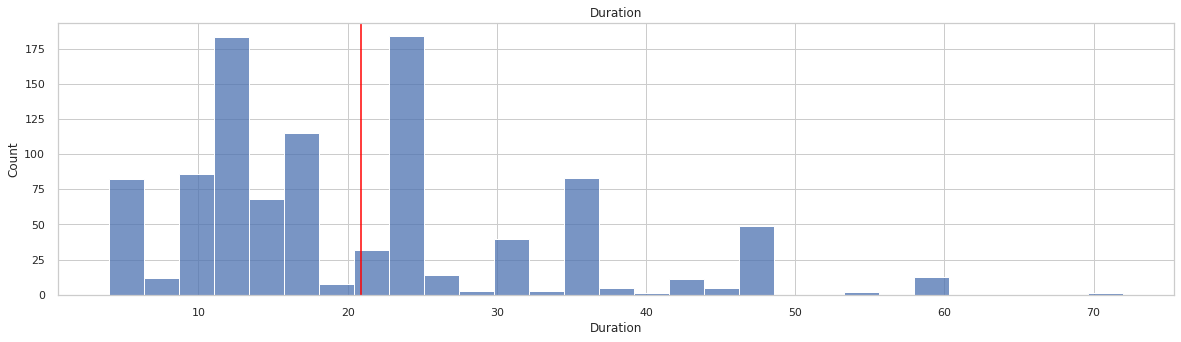

Rata-rata Durasi:  20.903


In [177]:
plt.figure(figsize=(20, 5))
sns.histplot(data=data, x='Duration')
plt.axvline(x=data['Duration'].mean(), color='red')
plt.title('Duration')
plt.show()
print('Rata-rata Durasi: ', data['Duration'].mean())

Bisa dilihat durasi penggunakan kartu kredit sangat beragam dari 4 bulan hingga 72 bulan dengan rata-rata orang menggunakan kartu kredit selama 21 bulan.

### Purpose

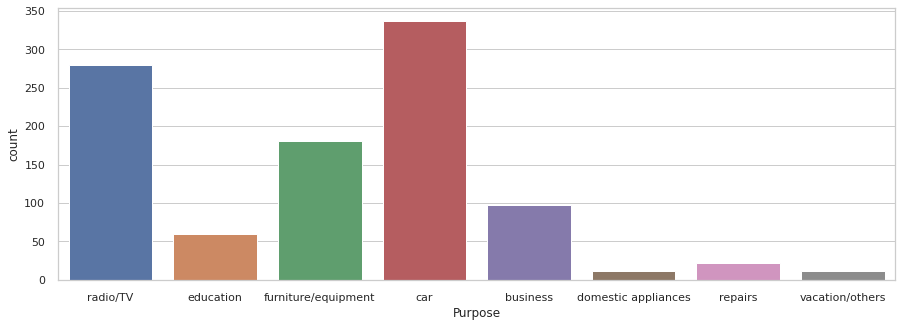

In [178]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=data, x='Purpose')
plt.show()

Kebanyakan orang Indonesia ternyata menggunakan kartu kredit untuk melakukan cicilan mobil dan disusul oleh cicilan media seperti tv dan ketiga biasanya digunakan untuk cicilan furniture.

## Data Preprocessing

### Make Data Inference

In [179]:
## Get data for model inference
df_inf = data.sample(25, random_state=7)
df_inf

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
778,38,male,3,own,rich,NaN,70810689,36,car
334,23,male,2,rent,little,little,50959890,24,furniture/equipment
271,37,female,2,rent,quite rich,NaN,17383398,12,furniture/equipment
802,24,female,2,own,little,little,52968528,20,furniture/equipment
216,31,male,2,own,little,little,38486496,18,business
408,26,male,3,own,quite rich,NaN,40110765,24,radio/TV
812,24,male,2,own,little,little,119389971,36,car
94,54,male,2,own,rich,moderate,16341882,12,car
487,62,female,2,free,little,NaN,46583043,24,car
170,33,male,2,rent,little,little,11779050,15,car


In [180]:
# remove inference set from data set
train = data.drop(df_inf.index)
train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,49,male,1,own,little,NaN,25988304,12,education
3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,40,male,3,own,little,little,47822943,30,car
997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,23,male,2,free,little,little,22876155,45,radio/TV


In [181]:
#reset index to reduce error
train.reset_index(drop= True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,49,male,1,own,little,NaN,25988304,12,education
3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,53,male,2,free,little,little,60383130,24,car


In [182]:
df_inf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,38,male,3,own,rich,NaN,70810689,36,car
1,23,male,2,rent,little,little,50959890,24,furniture/equipment
2,37,female,2,rent,quite rich,NaN,17383398,12,furniture/equipment
3,24,female,2,own,little,little,52968528,20,furniture/equipment
4,31,male,2,own,little,little,38486496,18,business


Sebelum memulai data preprocessing kita akan memisahkan data yang digunakan untuk train dan juga inference. Data yang digunakan untuk train sejumlah 975 data dan 25 data sisanya untuk inference.

### Handling Missing Values

In [183]:
# Mengecek jumlah missing value tiap kolom pada Train-Set

train.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     179
Checking account    383
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Setelah dilakukan checking ternyata terdapat beberapa missing values pada kolom `Saving accounts` dan `Checking accounts` dimana kolom tersebut menunjukan jumlah rekening tabungan dan rekening giro, karena itu menurut saya missing values tersebut hanya menunjukan orang yang tidak memiliki rekening sehingga akan saya ganti missing values menjadi **No Account**.

In [184]:
train.fillna(value='No Account', inplace=True)
train.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

Sekarang sudah tidak ada lagi missing values pada `Saving accounts` dan `Checking accounts`

### Handling Outliers

In [185]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable, 'skewness value : ', df[variable].skew())

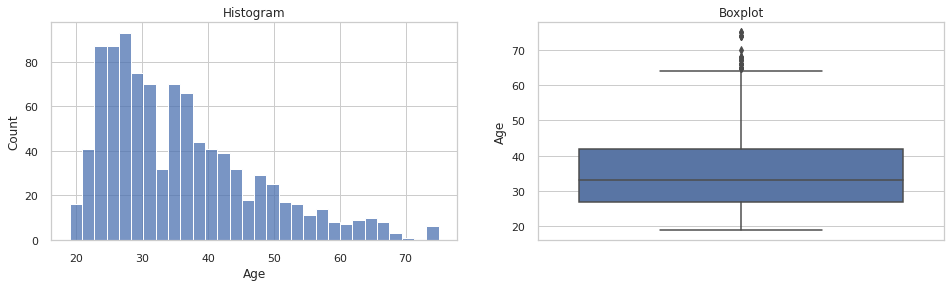

Age skewness value :  1.0152714691754394


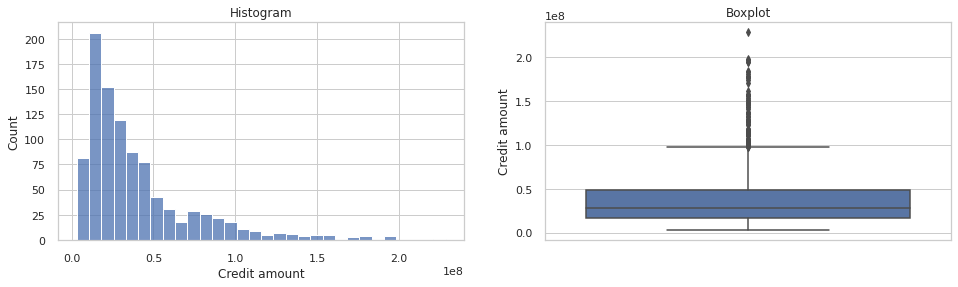

Credit amount skewness value :  1.9570593517543167


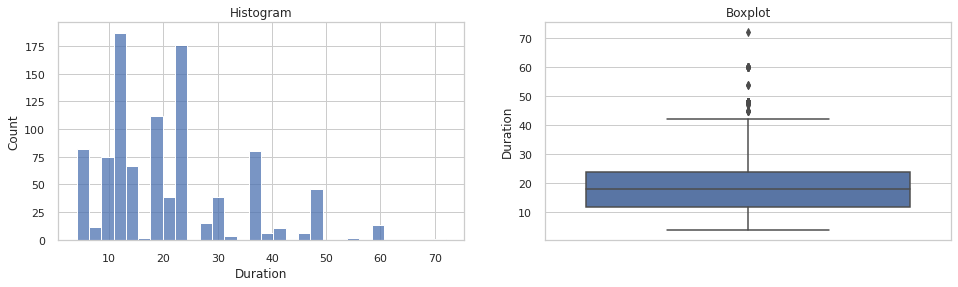

Duration skewness value :  1.1059416700828468


In [186]:
diagnostic_plots(train, 'Age')
diagnostic_plots(train, 'Credit amount')
diagnostic_plots(train, 'Duration')

Setelah dicek ternyata terdapat beberapa outliers pada kolom `Age`, `Credit Amount`, dan `Duration`. Karena ketiga kolom tersebut bertipe skewed maka akan dideteksi menggunakan IQR.

In [187]:
def find_skewed_boundaries(df, variable, distance): # untuk distribusi skewed
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [188]:
upper_boundary, lower_boundary = find_skewed_boundaries(train, 'Age', 1.5)

print('Jumlah Data Train: {}'.format(len(train)))
print('Jumlah data di luar upper boundary : {}'.format(len(train[train['Age'] > upper_boundary])))
print('Jumlah data di luar lower boundary : {}'.format(len(train[train['Age'] < lower_boundary])))
print('')
print('% upper boundary outliers : {}'.format(len(train[train['Age'] > upper_boundary]) / len(train) * 100))
print('% lower boundary outliers  : {}'.format(len(train[train['Age'] < lower_boundary]) / len(train) * 100))

Jumlah Data Train: 975
Jumlah data di luar upper boundary : 23
Jumlah data di luar lower boundary : 0

% upper boundary outliers : 2.358974358974359
% lower boundary outliers  : 0.0


In [189]:
upper_boundary, lower_boundary = find_skewed_boundaries(train, 'Credit amount', 1.5)

print('Jumlah Data Train: {}'.format(len(train)))
print('Jumlah data di luar upper boundary : {}'.format(len(train[train['Credit amount'] > upper_boundary])))
print('Jumlah data di luar lower boundary : {}'.format(len(train[train['Credit amount'] < lower_boundary])))
print('')
print('% upper boundary outliers : {}'.format(len(train[train['Credit amount'] > upper_boundary]) / len(train) * 100))
print('% lower boundary outliers  : {}'.format(len(train[train['Credit amount'] < lower_boundary]) / len(train) * 100))

Jumlah Data Train: 975
Jumlah data di luar upper boundary : 73
Jumlah data di luar lower boundary : 0

% upper boundary outliers : 7.487179487179488
% lower boundary outliers  : 0.0


In [190]:
upper_boundary, lower_boundary = find_skewed_boundaries(train, 'Duration', 1.5)

print('Jumlah Data Train: {}'.format(len(train)))
print('Jumlah data di luar upper boundary : {}'.format(len(train[train['Duration'] > upper_boundary])))
print('Jumlah data di luar lower boundary : {}'.format(len(train[train['Duration'] < lower_boundary])))
print('')
print('% upper boundary outliers : {}'.format(len(train[train['Duration'] > upper_boundary]) / len(train) * 100))
print('% lower boundary outliers  : {}'.format(len(train[train['Duration'] < lower_boundary]) / len(train) * 100))

Jumlah Data Train: 975
Jumlah data di luar upper boundary : 68
Jumlah data di luar lower boundary : 0

% upper boundary outliers : 6.9743589743589745
% lower boundary outliers  : 0.0


Menggunakan IQR kita bisa lihat bahwa persentase outliers pada `Age` adalah 2.35%, outliers pada `Credit Amount` adalah 7.49%, dan `Duration` mencapai 6.97%. 

Namun karena data ini merupakan data user kartu kredit jadi menurut saya pribadi outliers ini merupakan natural outliers jadi outliers pada data ini akan dibiarkan.

Karena ketiga kolom bertipe skewed, maka akan dilakukan normalisasi menggunakan log transformation.

In [191]:
num_df = train[['Age', 'Duration', 'Credit amount']]
num_df = np.log(num_df)

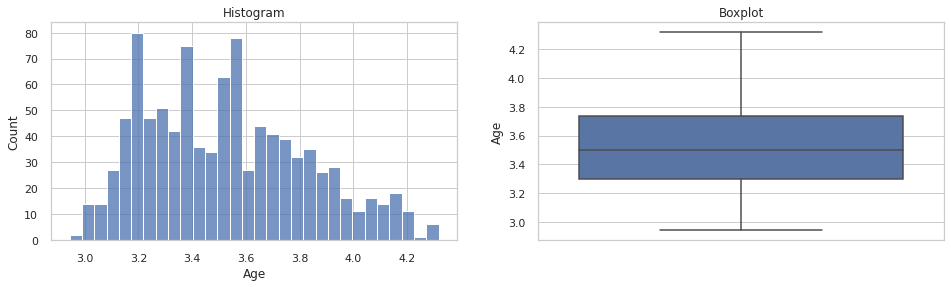

Age skewness value :  0.4063365021335119


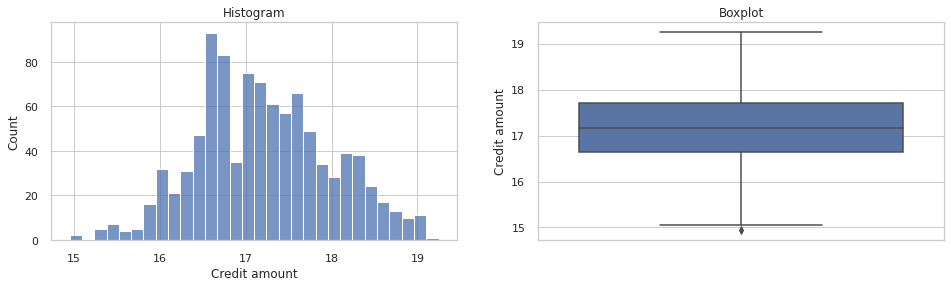

Credit amount skewness value :  0.13947452029713076


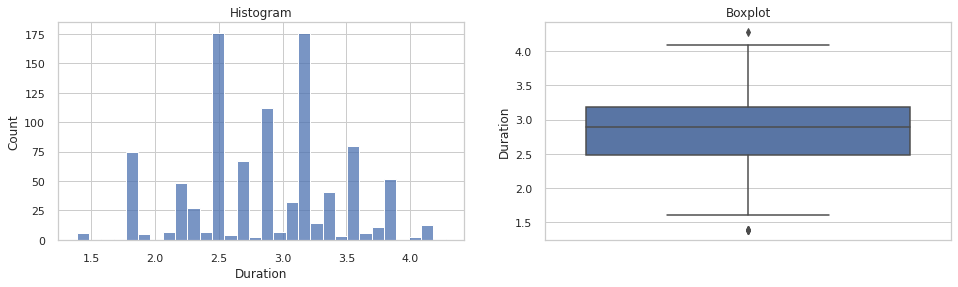

Duration skewness value :  -0.12129852714110066


In [192]:
diagnostic_plots(num_df, 'Age')
diagnostic_plots(num_df, 'Credit amount')
diagnostic_plots(num_df, 'Duration')

### Feature Selection

In [193]:
#Memilih feature numerical dan categorical
num_columns =['Age', 'Credit amount','Duration']
cat_columns = ['Sex','Job', 'Housing','Saving accounts', 'Checking account', 'Purpose']

In [194]:
num_df

,Age,Duration,Credit amount
0,4.204693,1.791759,16.489275
1,3.091042,3.871201,18.116686
2,3.891820,2.484907,17.073157
3,3.806662,3.737670,18.397708
4,3.970292,3.178054,17.916220
...,...,...,...
970,3.433987,2.484907,16.884710
971,3.688879,3.401197,17.683016
972,3.637586,2.484907,16.114970
973,3.135494,3.806662,16.945606


### Feature Scalling

In [195]:
# Feature scaling menggunakan MinMaxScaler

scaler = StandardScaler()
scaler.fit(num_df) #.fit hanya di Train-Set

train_scaled = scaler.transform(num_df)

In [196]:
# Convert kembali ke bentuk dataframe
df_scaled = pd.DataFrame(train_scaled, columns=num_columns)
df_scaled

,Age,Credit amount,Duration
0,2.265794,-1.852059,-0.922893
1,-1.448802,1.710336,1.164645
2,1.222204,-0.664594,-0.173927
3,0.938159,1.481576,1.525123
4,1.483947,0.522871,0.907501
...,...,...,...
970,-0.304905,-0.664594,-0.415655
971,0.545292,0.905149,0.608361
972,0.374202,-0.664594,-1.403028
973,-1.300532,1.599771,-0.337542


### Variance Inflation Factor (VIF)

In [197]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_scaled.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(len(df_scaled.columns))]

vif_data

,feature,VIF
0,Age,1.007387
1,Credit amount,1.630665
2,Duration,1.629116


Ternyata fitur yang ada tidak saling berkaitan maka akan kita biarkan tetap 3 dimensi. Kita akan memastikan lagi menggunakan EVR.

### Eplained Variance Ratio

In [198]:
pca=PCA(whiten=True)
pca.fit(df_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

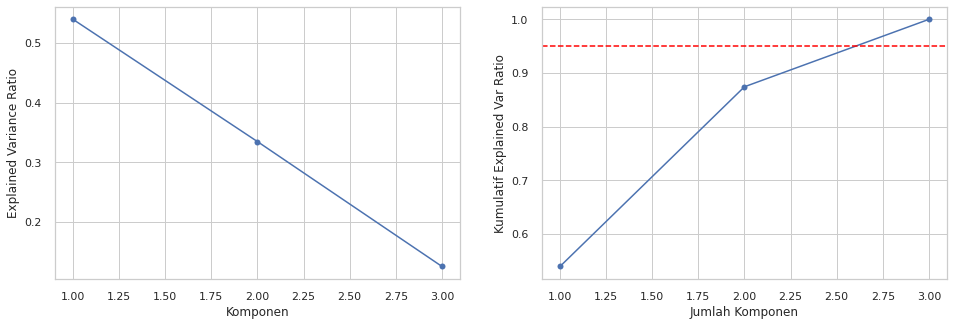

In [199]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,4),pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,4),np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='red', linestyle='--')
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

Berdasarkan EVR kita bisa mempertahankan 95% informasi dari data dengan menggunakan 3 komponen. Maka data train tidak akan direduksi dan tetap menjadi 3 dimensi.

## Model Definition

Untuk kasus clustering ini saya memilih untuk menggunakan 3 algortima yaitu KMeans, Agglomerative Clustering dan Spectral Clustering, namun sebelumnya kita harus menemukan jumlah cluster yang tepat menggunakan perhitungan inertia dan silhouette score.

In [200]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=7).fit(df_scaled)
                for k in range(1, 9)]

Elbow Method


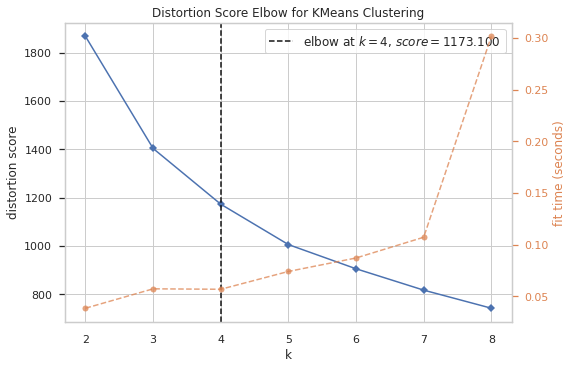

In [201]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=8)
Elbow_M.fit(df_scaled)
Elbow_M.show()

Berdasarkan Elbow Method didapatkan jumlah cluster 4, namun akan dipastikan lagi menggunakan silhouette method.

In [202]:
k=[2,3,4,5,6,7,8,9]
kmeans_per_k = [KMeans(n_clusters=k, random_state=7).fit(df_scaled)
                for k in range(1, 9)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [203]:
silhouette_scores = [silhouette_score(df_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

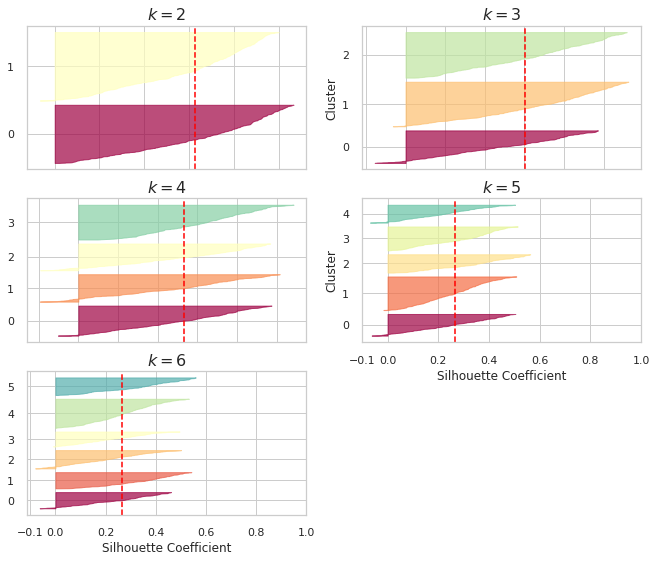

In [204]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_scaled, y_pred)

    padding = len(df_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Text(0, 0.5, 'Silhouette Score')

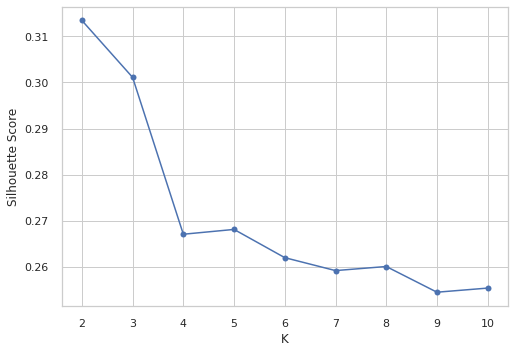

In [205]:
K=[2,3,4,5,6,7,8,9,10]
s_score=[silhouette_score(df_scaled, KMeans(n_clusters=i).fit(df_scaled).labels_) for i in K]
plt.plot(K, s_score,  marker='o')
plt.xlabel('K')
plt.ylabel('Silhouette Score')

In [206]:
s_score

[0.31348006825545216,
 0.3011092493930956,
 0.2670320906866573,
 0.26807743086605057,
 0.26194255126681665,
 0.2591349653921771,
 0.2600228586536575,
 0.2544382742818154,
 0.2553342560919081]

Dari hasil Silhouette score ternyata jumlah cluster 2 memiliki score paling tinggi yaitu 0.31, namun saya memilih menggunakan 3 cluster supaya hasil cluster lebih beragam.



## Model Training

### KMeans

In [207]:
kmeans = KMeans(n_clusters=3, random_state=7)
kmeans.fit(df_scaled)
train['Cluster'] = kmeans.labels_
train['Cluster'] = train['Cluster'].astype('category')

## Model Evaluation

In [208]:
fig = px.scatter_3d(train, x='Age', y='Duration', z='Credit amount',
              color='Cluster')
fig.show()

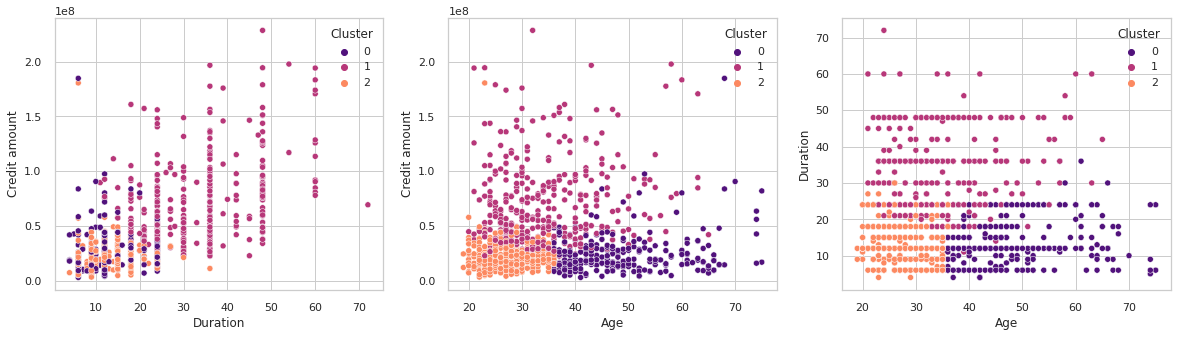

In [209]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(train['Duration'], train['Credit amount'], hue=train['Cluster'], ax=ax[0], palette='magma');
sns.scatterplot(train['Age'], train['Credit amount'], hue=train['Cluster'], ax=ax[1], palette='magma');
sns.scatterplot(train['Age'], train['Duration'], hue=train['Cluster'], ax=ax[2], palette='magma');

Dari visual hasil clustering di atas kita bisa melihat bahwa hasil clustering menggunakan KMeans hasilnya baik karena datanya terpisah dengan rapih, tidak ada yang bertumpuk/bercampur, dan jelas pembagian clusternya.

## Clustering Analysis

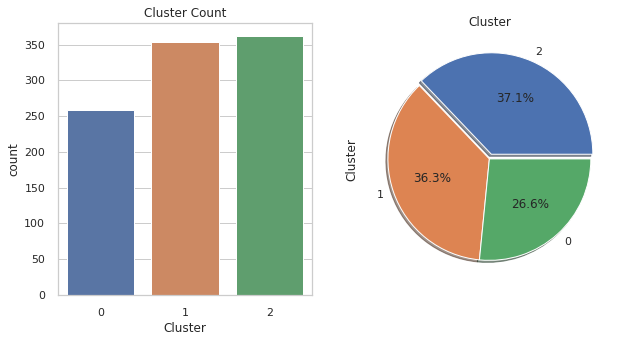

In [222]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Cluster', data=train)
plt.title('Cluster Count')

plt.subplot(1, 2, 2)
train['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0, 0], shadow=True)
plt.title('Cluster')
plt.show()

Kita bisa melihat jumlah data tiap cluster dari visual di atas, cluster 0 memiliki jumlah paling sedikit yaitu sebanyak 26.6% dari keseluruhan data dan cluster 1 sebanyak 36.3% dan cluster 2 sebanyak 37.1% dari keseluruhan data.

In [234]:
grouped = train.groupby(['Cluster'], as_index=False).mean().round(1)
grouped

,Cluster,Age,Job,Credit amount,Duration
0,0,48.4,1.7,24434694.9,13.9
1,1,34.4,2.1,71421812.6,32.4
2,2,27.6,1.8,21709998.2,14.5


In [235]:
c0 = train[train['Cluster']==0]
c1 = train[train['Cluster']==1]
c2 = train[train['Cluster']==2]

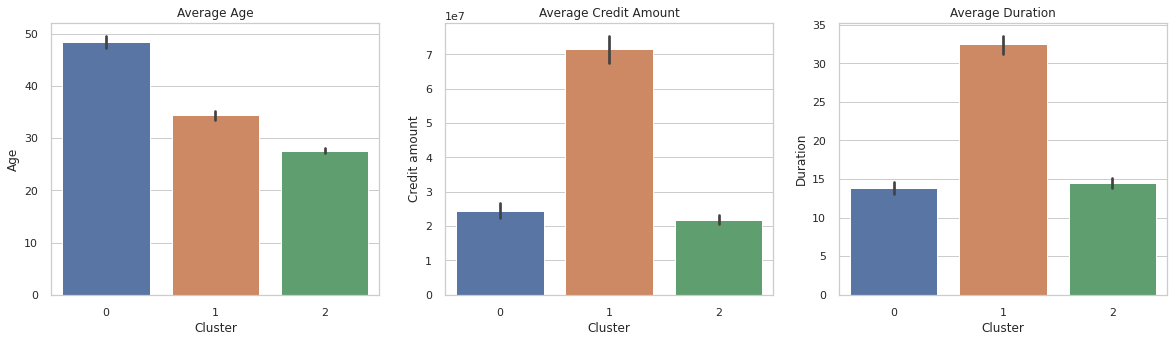

In [236]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=train, x="Cluster", y="Age")
plt.title('Average Age')

plt.subplot(1, 3, 2)
sns.barplot(data=train, x="Cluster", y="Credit amount")
plt.title('Average Credit Amount')

plt.subplot(1, 3, 3)
sns.barplot(data=train, x="Cluster", y="Duration")
plt.title('Average Duration')
plt.show()

Berdasarkan visual di atas kita bisa ambil insight:
* Cluster 0 berisi orang yang lebih tua dengan credit amount dan durasi rendah.
* Cluster 1 berisi orang dengan umur produktif dengan credit amount dan durasi tinggi.
* Cluster 2 berisi orang yang lebih muda dengan credit amount dan durasi rendah.

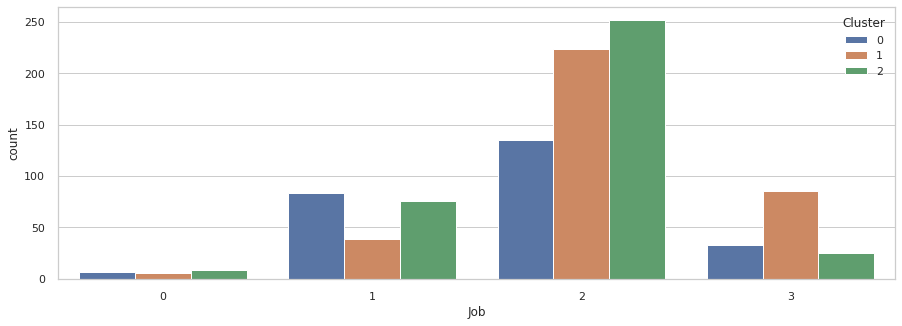

In [238]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x='Job', hue='Cluster')
plt.show()

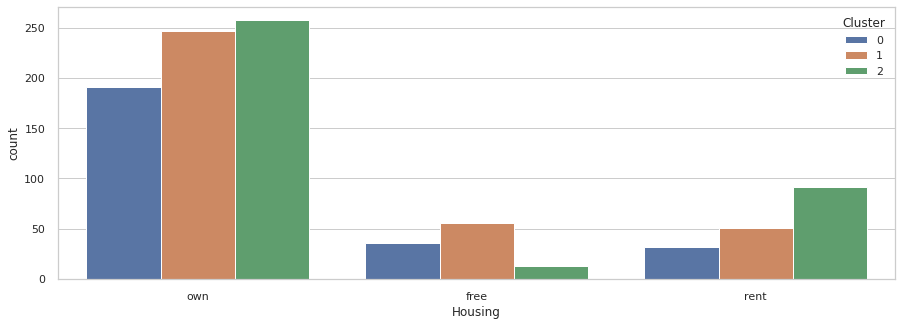

In [239]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x='Housing', hue='Cluster')
plt.show()

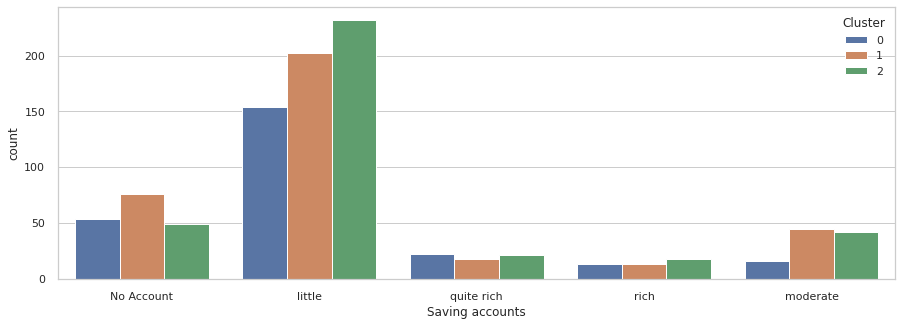

In [242]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x='Saving accounts', hue='Cluster')
plt.show()

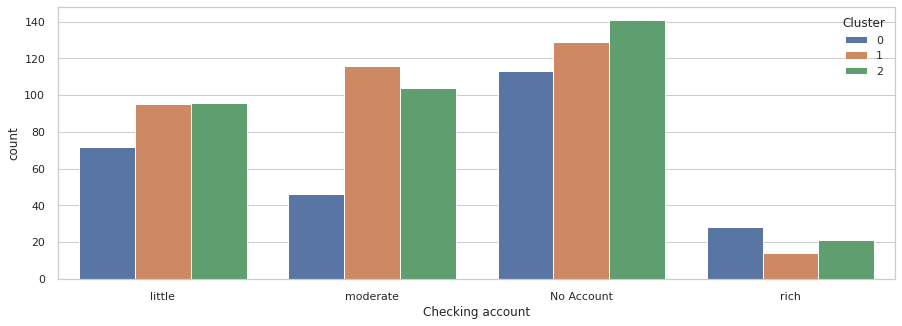

In [243]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x='Checking account', hue='Cluster')
plt.show()

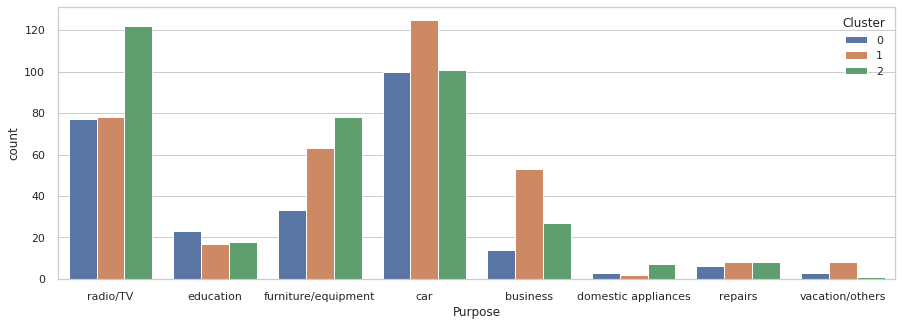

In [244]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x='Purpose', hue='Cluster')
plt.show()

## Model Inference

### Inferencing

In [210]:
df_inf.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,38,male,3,own,rich,NaN,70810689,36,car
1,23,male,2,rent,little,little,50959890,24,furniture/equipment
2,37,female,2,rent,quite rich,NaN,17383398,12,furniture/equipment
3,24,female,2,own,little,little,52968528,20,furniture/equipment
4,31,male,2,own,little,little,38486496,18,business


In [211]:
df_inf.isnull().sum()

Age                  0
Sex                  0
Job                  0
Housing              0
Saving accounts      4
Checking account    11
Credit amount        0
Duration             0
Purpose              0
dtype: int64

In [212]:
df_inf.fillna(value='No Account', inplace=True)
df_inf.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [213]:
df_test_num = df_inf[num_columns]
df_test_cat = df_inf[cat_columns]

In [221]:
df_test_num

,Age,Credit amount,Duration
0,38,70810689,36
1,23,50959890,24
2,37,17383398,12
3,24,52968528,20
4,31,38486496,18
5,26,40110765,24
6,24,119389971,36
7,54,16341882,12
8,62,46583043,24
9,33,11779050,15


In [215]:
# scaling test set
test_scaled = scaler.transform(df_test_num)
df_scaled = pd.DataFrame(test_scaled, columns=num_columns)

In [216]:
pred = kmeans.predict(df_scaled)
df_inf['Cluster'] = pred
df_inf['Cluster'] = df_inf['Cluster'].astype('category')

In [217]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

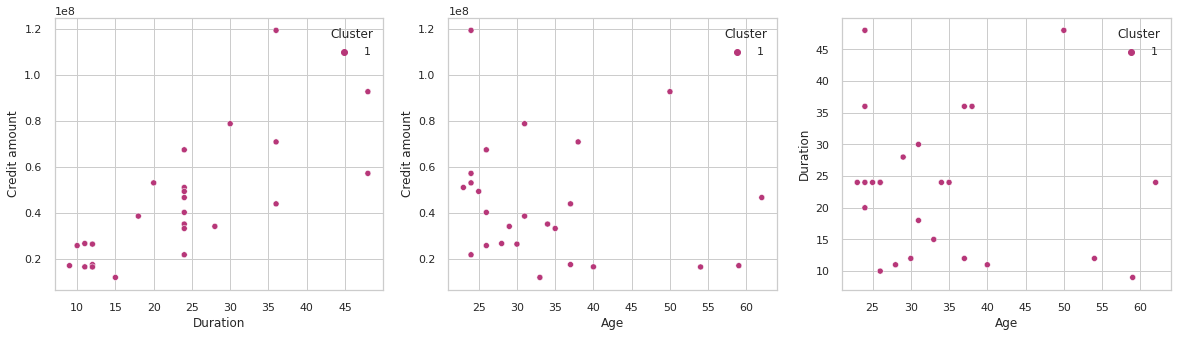

In [218]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(df_inf['Duration'], df_inf['Credit amount'], hue=df_inf['Cluster'], ax=ax[0], palette='magma');
sns.scatterplot(df_inf['Age'], df_inf['Credit amount'], hue=df_inf['Cluster'], ax=ax[1], palette='magma');
sns.scatterplot(df_inf['Age'], df_inf['Duration'], hue=df_inf['Cluster'], ax=ax[2], palette='magma');

Hasil visual di atas menunjukan hasil clustering pada Test-Set dan ternyata model kita memprediksi semua data test menjadi cluster 1.

# Conclusion

Dataset kali ini berisikan data-data pengguna kartu kredit. Data-datanya berisi seperti umur, durasi, gender, jumlah tagihan, dan lain-lain. 

Dari Dataset kita bisa mendapat insight : 
- Mayoritas user berusia produktif yaitu 25 tahun - 35 tahun
- 69% user berjenis kelamin laki-laki.
- Rentang credit amount yang dimiliki user berada pada 3 juta rupiah hingga 200 juta rupiah dengan rata-rata 40 juta.
- Mayortitas customer memiliki job pada category skilled.
- Mayoritas customer memiliki tempat tinggal milik pribadi.
- Mayoritas customer memiliki rekening tabungan dengan jumlah sedikit.
- Mayoritas customer memiliki rekening giro dengan jumlah sedikit dan sedang.
- Tujuan peminjaman paling banyak adalah untuk tujuan kredit mobil, pembelian radio/TV, dan pembelin furniture/equipment.

Saya melakukan clustering menggunakan KMeans clustering dengan jumlah cluster 3 dimana jumlah tersebut diperoleh dari hasil inertia dan silhouette score. Secara sekilas kita bisa melihat bahwa hasil clustering antar model kita cukup baik namun model KMeans memperoleh hasil yang cukup baik karena secara visual pada model KMeans tidak ada data yang bercampur/bertumpuk.

Hasil Clustering :
* Cluster 0 berisi orang yang lebih tua dengan credit amount dan durasi rendah.
* Cluster 1 berisi orang dengan umur produktif dengan credit amount dan durasi tinggi.
* Cluster 2 berisi orang yang lebih muda dengan credit amount dan durasi rendah.

